In [1]:
import os
from glob import glob
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import holoviews as hv

# Solar Radiation

In [2]:
sr = 'Solar_radiation.nc'
solar_radiation = xr.open_dataset(sr, chunks='auto')

In [3]:
def ds_swaplon(ds):
    return ds.assign_coords(longitude=(((ds.longitude + 180) % 360) - 180)).sortby('longitude')

solar_radiation = ds_swaplon(solar_radiation)

<Figure size 1800x1200 with 0 Axes>

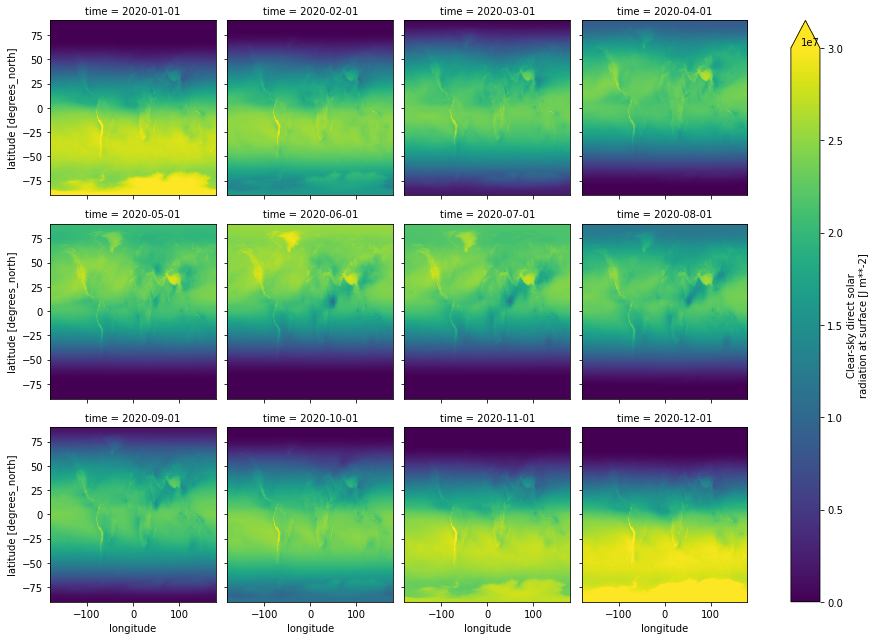

In [4]:
f = plt.figure(dpi=300)
solar = solar_radiation['cdir'].plot.imshow(x='longitude', y='latitude', col="time", vmax = 3e7, col_wrap=4, cmap='viridis')
solar

In [4]:
polar_lat = 66.5
#arctic_idx = slice(polar_lat,90)
arctic_solar_idx = (solar_radiation['latitude'] >= polar_lat)
antarctic_solar_idx = (solar_radiation['latitude'] <= -polar_lat)
nonpolar_solar_idx = (solar_radiation['latitude'] < polar_lat) & (solar_radiation['latitude'] > -polar_lat)

arctic_solar = solar_radiation.where(arctic_solar_idx).mean(dim=('latitude', 'longitude'))
antarctic_solar = solar_radiation.where(antarctic_solar_idx).mean(dim=('latitude', 'longitude'))
nonpolar_solar = solar_radiation.where(nonpolar_solar_idx).mean(dim=('latitude', 'longitude'))
global_solar = solar_radiation.cdir.mean(dim=('latitude', 'longitude'))


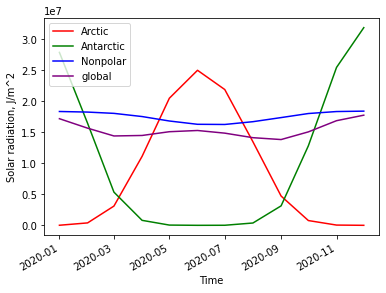

In [5]:
f, axs = plt.subplots()
arctic_solar.cdir.plot(ax = axs, color='r', label = 'Arctic')
antarctic_solar.cdir.plot(ax = axs, color='green', label = 'Antarctic')
nonpolar_solar.cdir.plot(ax = axs, color='blue', label = 'Nonpolar')
global_solar.plot(ax = axs, color='purple', label = 'global')
axs.set_xlabel('Time')
axs.set_ylabel('Solar radiation, J/m^2')
plt.legend()

In [12]:
#solar.fig.savefig('Solar_radiation.svg', format='svg', dpi=1200)

In [20]:
#f.savefig('Mean_solar_radiation.svg', format='svg', dpi=1200)

# Ocean surface temperature

In [17]:
ts = 'adaptor.mars.internal-1646455031.5664723-26078-17-058da7a0-5295-445a-8503-0894f96d9fa6.nc'
temp = xr.open_dataset(ts, chunks='auto')

In [18]:
def ds_swaplon(ds):
    return ds.assign_coords(longitude=(((ds.longitude + 180) % 360) - 180)).sortby('longitude')

In [19]:
temp = ds_swaplon(temp)

In [20]:
temp['sst']-=273.15
temp['sst'].attrs['units'] = 'C'

In [24]:
polar_lat = 66.5
#arctic_idx = slice(polar_lat,90)
arctic_temp_idx = (temp['latitude'] >= polar_lat)
antarctic_temp_idx = (temp['latitude'] <= -polar_lat)
nonpolar_temp_idx = (temp['latitude'] < polar_lat) & (temp['latitude'] > -polar_lat)

arctic_temp = temp.where(arctic_temp_idx).mean(dim=('latitude', 'longitude'))
antarctic_temp = temp.where(antarctic_temp_idx).mean(dim=('latitude', 'longitude'))
nonpolar_temp = temp.where(nonpolar_temp_idx).mean(dim=('latitude', 'longitude'))
global_temp = temp.sst.mean(dim=('latitude', 'longitude'))


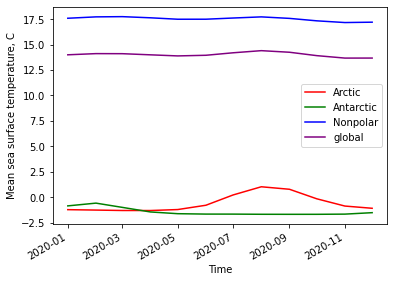

In [25]:

f, axs = plt.subplots()
arctic_temp.sst.plot(ax = axs, color='r', label = 'Arctic')
antarctic_temp.sst.plot(ax = axs, color='green', label = 'Antarctic')
nonpolar_temp.sst.plot(ax = axs, color='blue', label = 'Nonpolar')
global_temp.plot(ax = axs, color='purple', label = 'global')
axs.set_xlabel('Time')
axs.set_ylabel('Mean sea surface temperature, C')
plt.legend()

<Figure size 1800x1200 with 0 Axes>

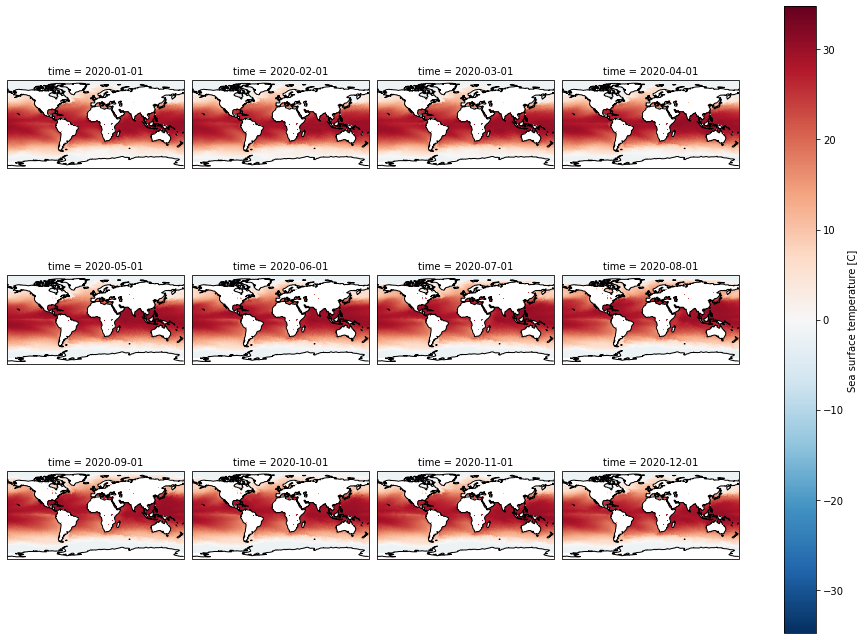

In [13]:
#proj = ccrs.PlateCarree()
f = plt.figure(dpi=300)
#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.coastlines() 
#chlor_array['chlor_a'].sel(time='2020-01-01T00:00:00.000000000').plot.imshow(ax=ax, robust=True);
fg = temp['sst'].plot.imshow(x='longitude', y='latitude', col="time", col_wrap=4,subplot_kws=dict(projection=ccrs.PlateCarree()),transform=ccrs.PlateCarree())
for ax in fg.axes.flat:
    ax.size(20,5)
    ax.coastlines()

<Figure size 1800x1200 with 0 Axes>

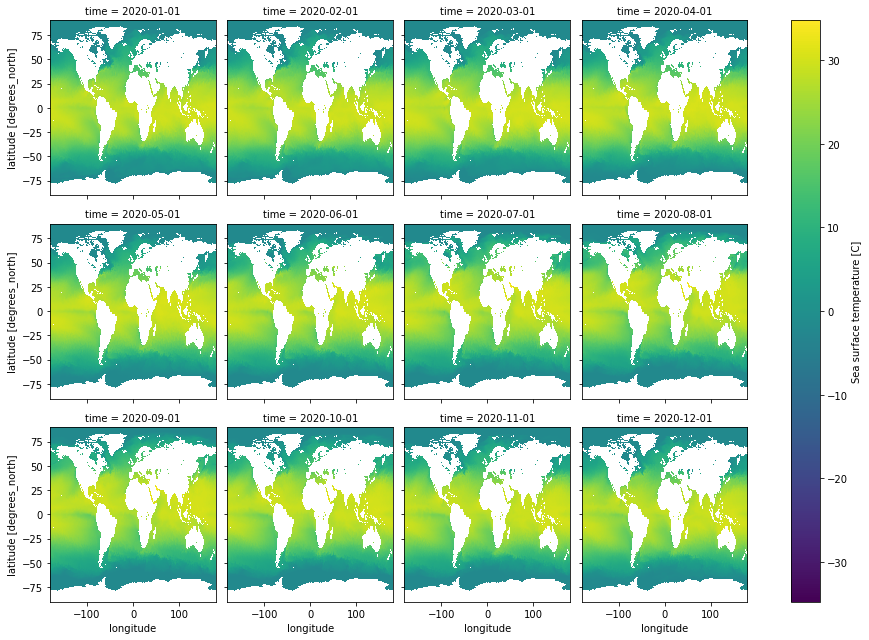

In [7]:
f = plt.figure(dpi=300)
#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.coastlines() 
#chlor_array['chlor_a'].sel(time='2020-01-01T00:00:00.000000000').plot.imshow(ax=ax, robust=True);
temp_surface_image = temp['sst'].plot.imshow(x='longitude', y='latitude', col="time", col_wrap=4, cmap='viridis');

In [40]:
#temp_surface_image.fig.savefig('Sea_surface_temperature.svg', format='svg', dpi=1200)

# Air surface temperature

In [6]:
outdir = '/home/jovyan/labs/09_ndarrays_xarray_era5-quocbaouw/era5_data/climatology_0.25g_ea_2t.nc'
t_clim_ds = xr.open_dataset(outdir)
t_clim_ds['t2m']-=273.15
t_clim_ds['t2m'].attrs['units'] = 'C'

In [7]:
polar_lat = 66.5
#arctic_idx = slice(polar_lat,90)
arctic_idx = (t_clim_ds['latitude'] >= polar_lat)
antarctic_idx = (t_clim_ds['latitude'] <= -polar_lat)
nonpolar_idx = (t_clim_ds['latitude'] < polar_lat) & (t_clim_ds['latitude'] > -polar_lat)

arctic = t_clim_ds.where(arctic_idx).mean(dim=('latitude', 'longitude'))
antarctic = t_clim_ds.where(antarctic_idx).mean(dim=('latitude', 'longitude'))
nonpolar = t_clim_ds.where(nonpolar_idx).mean(dim=('latitude', 'longitude'))
global_temp = t_clim_ds.t2m.mean(dim=('latitude', 'longitude'))


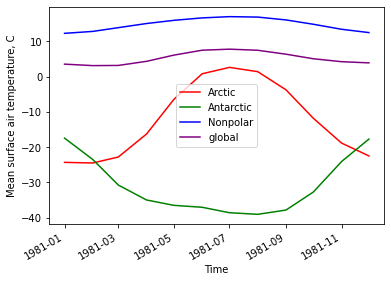

In [8]:
f, axs = plt.subplots()
arctic.t2m.plot(ax = axs, color='r', label = 'Arctic')
antarctic.t2m.plot(ax = axs, color='green', label = 'Antarctic')
nonpolar.t2m.plot(ax = axs, color='blue', label = 'Nonpolar')
global_temp.plot(ax = axs, color='purple', label = 'global')
axs.set_xlabel('Time')
axs.set_ylabel('Mean surface air temperature, C')
plt.legend()
#f.savefig('Mean_surface_air_temperature.svg', format='svg', dpi=1200)

<Figure size 1800x1200 with 0 Axes>

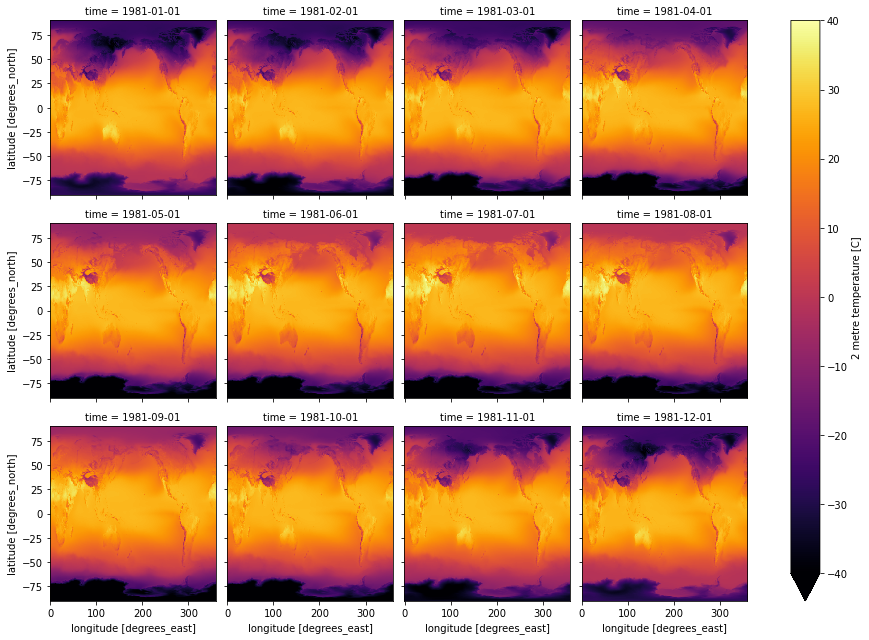

In [12]:
f = plt.figure(dpi=300)
temp_surface_air_image = t_clim_ds['t2m'].plot.imshow(x='longitude', y='latitude', col="time", col_wrap=4,vmax = 40, cmap='inferno');
temp_surface_air_image

In [12]:
#temp_surface_air_image.fig.savefig('Sea_surface_air_temperature.svg', format='svg', dpi=1200)

# Chlorophyll A

In [5]:
chlor_array = xr.open_dataset('/home/jovyan/labs/ocean_color/chlor.nc', chunks='auto')

<Figure size 1500x6000 with 0 Axes>

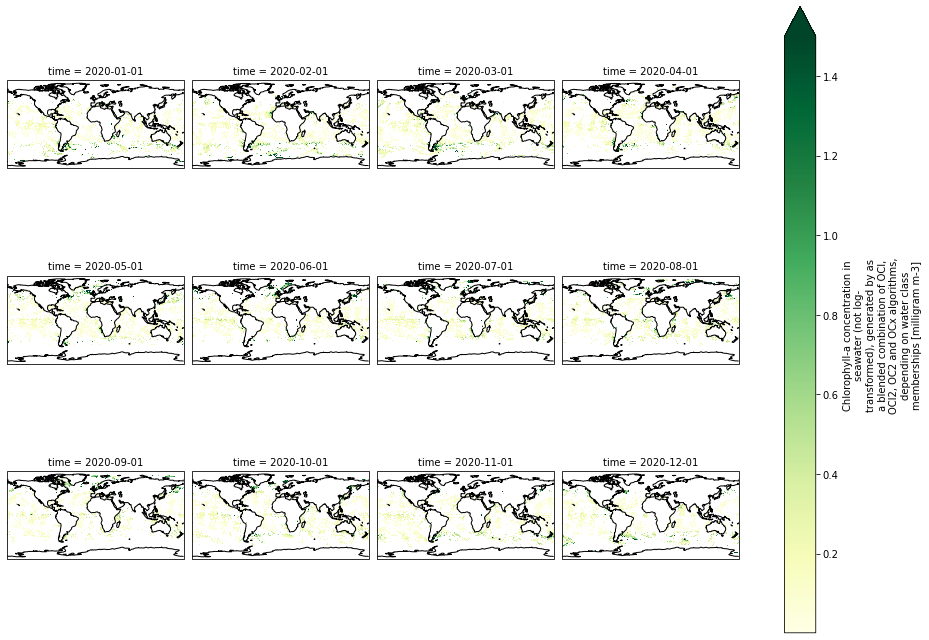

In [4]:
f = plt.figure(dpi=300,figsize=(5,20))
cg = chlor_array['chlor_a'].plot.imshow(x="lon", y="lat", vmax = 1.5,col = 'time', cmap='YlGn',col_wrap=4,subplot_kws=dict(projection=ccrs.PlateCarree()),transform=ccrs.PlateCarree())
for ax in cg.axes.flat:
    #ax.size(5,10)
    #ax.set_figsize(5,10)
    ax.coastlines()

In [4]:
#cg.fig.savefig('Chlor_a_coastline.svg', format='svg', dpi=1200)

In [ ]:
for ax in cg.axes.flat:
    ax.size(5,10)
    #ax.set_figsize(5,10)
    ax.coastlines()

<Figure size 1800x1200 with 0 Axes>

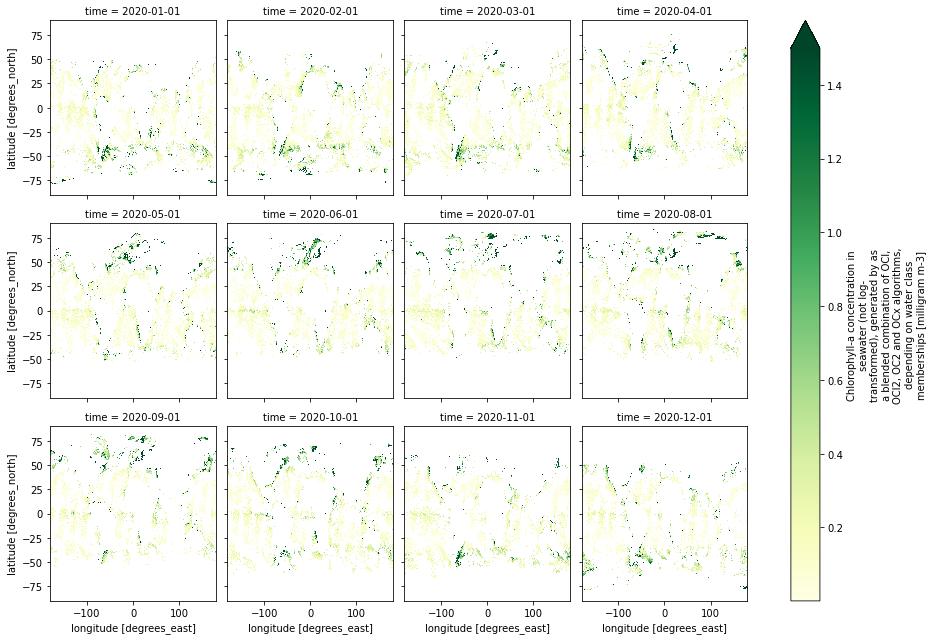

In [5]:
f = plt.figure(dpi=300)
#states_gdf_aea.plot(ax=ax, facecolor='none', edgecolor='k')
#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.coastlines() 
fg = chlor_array['chlor_a'].plot.imshow(x="lon", y="lat", vmax = 1.5,col = 'time', cmap='YlGn',col_wrap=4)
#fg.axes[1].coastlines() 

In [6]:
#fg.fig.savefig('Chlor_a.svg', format='svg', dpi=1200)

In [6]:
polar_lat = 66.5
#arctic_idx = slice(polar_lat,90)
arctic_idx = (chlor_array['lat'] >= polar_lat)
antarctic_idx = (chlor_array['lat'] <= -polar_lat)
nonpolar_idx = (chlor_array['lat'] < polar_lat) & (chlor_array['lat'] > -polar_lat)

In [7]:
arctic_chlor = chlor_array.where(arctic_idx).mean(dim=('lat', 'lon'), skipna=True)
antarctic_chlor = chlor_array.where(antarctic_idx).mean(dim=('lat', 'lon'), skipna=True)
nonpolar_chlor = chlor_array.where(nonpolar_idx).mean(dim=('lat', 'lon'), skipna=True)
global_chlor = chlor_array.chlor_a.mean(dim=('lat', 'lon'), skipna=True)

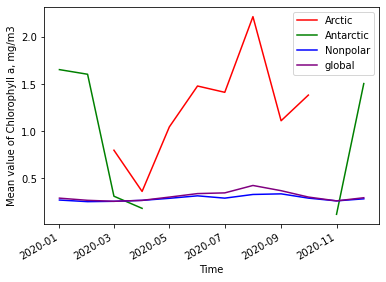

In [27]:
f, axs = plt.subplots()
arctic_chlor.chlor_a.plot(ax = axs, color='r', label = 'Arctic')
antarctic_chlor.chlor_a.plot(ax = axs, color='green', label = 'Antarctic')
nonpolar_chlor.chlor_a.plot(ax = axs, color='blue', label = 'Nonpolar')
global_chlor.plot(ax = axs, color='purple', label = 'global')
axs.set_xlabel('Time')
axs.set_ylabel('Mean value of Chlorophyll a, mg/m3')
plt.legend()


In [ ]:
#f.savefig('Mean_chlorophyll_a.svg', format='svg', dpi=1200)

In [9]:
import numpy.ma as ma

# Correlation between mean value of Chlorophyll A and mean surface air temperature in Arctic

In [29]:
temperature = arctic.t2m.values
chlora = arctic_chlor.chlor_a.values
chlora_nna = ma.masked_invalid(chlora)
corr_air_chlora = ma.corrcoef(temperature, chlora_nna)

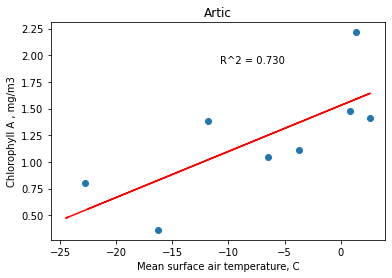

In [122]:
plt.scatter(x=temperature, y=chlora_nna)
m, b = ma.polyfit(temperature, chlora_nna, 1)

plt.plot(temperature, m*temperature + b, color ='red')
plt.xlabel('Mean surface air temperature, C')
plt.ylabel('Chlorophyll A , mg/m3')
plt.annotate("R^2 = {:.3f}".format(corr_air_chlora[0,1]), xy=(-5, 2),horizontalalignment='right', verticalalignment='top');
plt.title('Artic')
#plt.savefig('Corr_air_chlorA.svg', format='svg', dpi=1200)

# Correlation between mean value of Chlorophyll A and mean surface air temperature in Anarctica

In [123]:
temperature = antarctic.t2m.values
chlora = antarctic_chlor.chlor_a.values
chlora_nna = ma.masked_invalid(chlora)
corr_air_chlora = ma.corrcoef(temperature, chlora_nna)

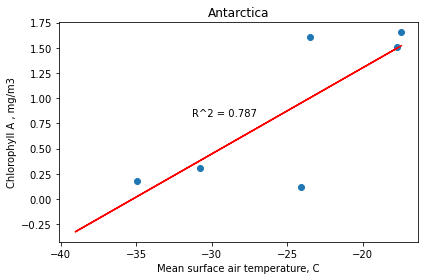

In [124]:
plt.scatter(x=temperature, y=chlora_nna)
m, b = ma.polyfit(temperature, chlora_nna, 1)

plt.plot(temperature, m*temperature + b, color ='red')
plt.xlabel('Mean surface air temperature, C')
plt.ylabel('Chlorophyll A , mg/m3')
#plt.annotate(f'R^2 = {corr_air_chlora[0,1]}',xy=(-27, 0))
plt.annotate("R^2 = {:.3f}".format(corr_air_chlora[0,1]), xy=(-27, 0.9),horizontalalignment='right', verticalalignment='top');
plt.title('Antarctica')
plt.tight_layout()
plt.savefig('Corr_air_chlorA_Antarctica.svg', format='svg', dpi=1200)

# Correlation between mean value of Chlorophyll A and mean ocean surface temperature in Arctic

In [45]:
temperature = arctic_temp.sst.values
chlora = arctic_chlor.chlor_a.values
chlora[7] = 'nan'
chlora_nna = ma.masked_invalid(chlora)
corr_air_chlora = ma.corrcoef(temperature, chlora_nna)

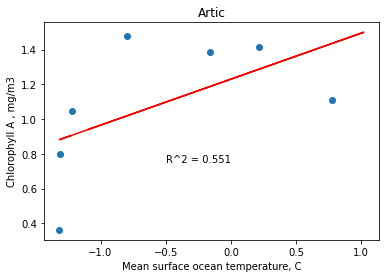

In [47]:
plt.scatter(x=temperature, y=chlora_nna)
m, b = ma.polyfit(temperature, chlora_nna, 1)

plt.plot(temperature, m*temperature + b, color ='red')
plt.xlabel('Mean surface ocean temperature, C')
plt.ylabel('Chlorophyll A , mg/m3')
plt.annotate("R^2 = {:.3f}".format(corr_air_chlora[0,1]), xy=(0, 0.8),horizontalalignment='right', verticalalignment='top');
plt.title('Artic')
#plt.savefig('Artic_Chlorophyll_surface_temp.svg', format='svg', dpi=1200)

# Correlation between mean value of Chlorophyll A and mean surface air temperature in nonpolar area

In [ ]:
temperature = nonpolar.t2m.values
chlora = nonpolar_chlor.chlor_a.values
chlora_nna = ma.masked_invalid(chlora)
corr_air_chlora = ma.corrcoef(temperature, chlora_nna)

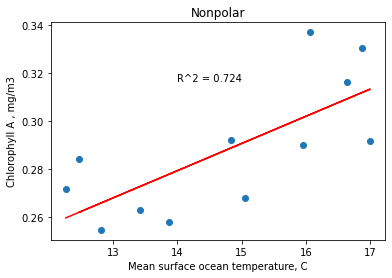

In [52]:
plt.scatter(x=temperature, y=chlora_nna)
m, b = ma.polyfit(temperature, chlora_nna, 1)

plt.plot(temperature, m*temperature + b, color ='red')
plt.xlabel('Mean surface ocean temperature, C')
plt.ylabel('Chlorophyll A , mg/m3')
plt.annotate("R^2 = {:.3f}".format(corr_air_chlora[0,1]), xy=(15, 0.32),horizontalalignment='right', verticalalignment='top');
plt.title('Nonpolar')
#plt.savefig('Nonpolar_Chlorophyll_air_temp.svg', format='svg', dpi=1200)

# Correlation between mean value of Chlorophyll A and mean ocean surface temperature in global

In [ ]:
temperature = global_temp.values
chlora = global_chlor.values
chlora_nna = ma.masked_invalid(chlora)
corr_air_chlora = ma.corrcoef(temperature, chlora_nna)

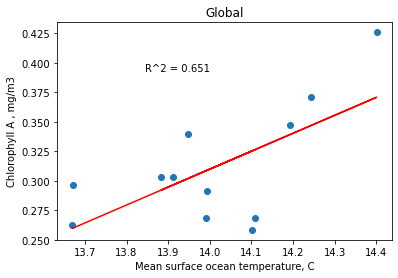

In [57]:
plt.scatter(x=temperature, y=chlora_nna)
m, b = ma.polyfit(temperature, chlora_nna, 1)

plt.plot(temperature, m*temperature + b, color ='red')
plt.xlabel('Mean surface ocean temperature, C')
plt.ylabel('Chlorophyll A , mg/m3')
plt.annotate("R^2 = {:.3f}".format(corr_air_chlora[0,1]), xy=(14, 0.4),horizontalalignment='right', verticalalignment='top');
plt.title('Global')
#plt.savefig('Global_Chlorophyll_air_temp.svg', format='svg', dpi=1200)

# Correlation between mean value of Chlorophyll A and mean solar radiation in Arctic

In [10]:
solar= arctic_solar.cdir.values
chlora = arctic_chlor.chlor_a.values
chlora_nna = ma.masked_invalid(chlora)
corr_air_chlora = ma.corrcoef(solar, chlora_nna)

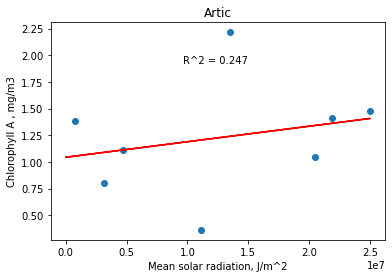

In [11]:
plt.scatter(x=solar, y=chlora_nna)
m, b = ma.polyfit(solar, chlora_nna, 1)

plt.plot(solar, m*solar + b, color ='red')
plt.xlabel('Mean solar radiation, J/m^2')
plt.ylabel('Chlorophyll A , mg/m3')
plt.annotate("R^2 = {:.3f}".format(corr_air_chlora[0,1]), xy=(1.5e7, 2),horizontalalignment='right', verticalalignment='top');
plt.title('Artic')
#plt.savefig('Correlation_Solar_chlorA.svg', format='svg', dpi=1200)

# Correlation between mean value of solar radiation and mean surface air temperature in Arctic

In [15]:
temperature = arctic.t2m.values
solar_values = arctic_solar.cdir.values
#solar_values_nna = ma.masked_invalid(solar_values)
corr_temperature_solar = np.corrcoef(temperature, solar_values)

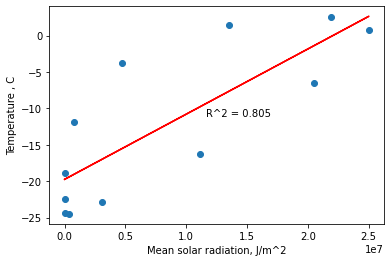

In [23]:
plt.scatter(x=solar_values, y=temperature)
m, b = ma.polyfit(solar_values,temperature, 1)

plt.plot(solar_values, m*solar_values + b, color ='red')
plt.xlabel('Mean solar radiation, J/m^2')
plt.ylabel('Temperature , C')
plt.annotate("R^2 = {:.3f}".format(corr_temperature_solar[0,1]), xy=(1.7e7,-10),horizontalalignment='right', verticalalignment='top');
#plt.title('Global')
plt.savefig('Solar_vs_temperature.svg', format='svg', dpi=1200)

# Correlation between mean value of solar radiation and mean surface air temperature in global

Text(0.5, 1.0, 'Global')

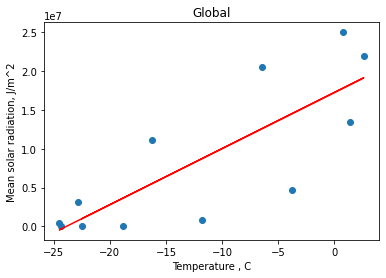

In [21]:
plt.scatter(x= temperature, y=solar_values)
m, b = ma.polyfit(temperature, solar_values,1)

plt.plot(temperature, m*temperature + b, color ='red')
plt.xlabel('Temperature , C')
plt.ylabel('Mean solar radiation, J/m^2')
plt.annotate("R^2 = {:.3f}".format(corr_temperature_solar[0,1]), xy=(1.7e7,-10),horizontalalignment='right', verticalalignment='top');
plt.title('Global')
#plt.savefig('Global_Chlorophyll_air_temp.svg', format='svg', dpi=1200)

# Correlation between mean value of solar radiation and mean surface air temperature in Anarctica

In [32]:
solar_values = arctic_solar.cdir.values
chlora = arctic_chlor.chlor_a.values
chlora_nna = ma.masked_invalid(chlora)
corr_air_chlora = ma.corrcoef(solar_values, chlora_nna)

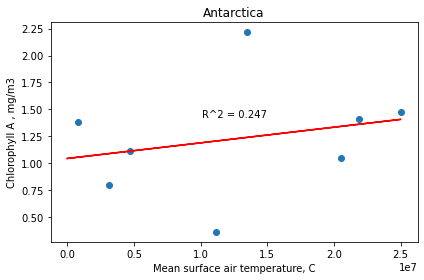

In [35]:
plt.scatter(x=solar_values, y=chlora_nna)
m, b = ma.polyfit(solar_values, chlora_nna, 1)

plt.plot(solar_values, m*solar_values + b, color ='red')
plt.xlabel('Mean surface air temperature, C')
plt.ylabel('Chlorophyll A , mg/m3')
#plt.annotate(f'R^2 = {corr_air_chlora[0,1]}',xy=(-27, 0))
plt.annotate("R^2 = {:.3f}".format(corr_air_chlora[0,1]), xy=(1.5e7, 1.5),horizontalalignment='right', verticalalignment='top');
plt.title('Antarctica')
plt.tight_layout()
plt.savefig('Corr_air_chlorA_Antarctica.svg', format='svg', dpi=1200)